Pergunta da Questão:

"2 - O conjunto de dados flor Íris ou conjunto de dados Íris de Fisher é um conjunto de dados
multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de
1936.
Desenvolva um script em python para encontrar a média do petal_length de cada espécie
presente no dataset.
Utilize a função pd.read_csv() para baixar o conteúdo disponível na url:"
https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

Questão Extra: 

"Na segunda questão, é um diferencial plotar gráficos para visualização dos resultados"


# **Construção da Resposta**

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leitura do csv

In [126]:
df_iris = pd.read_csv("/content/iris.csv", sep = ",")

In [127]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Encontrar a média do petal_length de cada espécie
presente no dataset

In [128]:
calc_media = df_iris.groupby(df_iris["species"])["petal_length"].mean()
calc_media

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

Para ser mais detalhado nas contas, iremos fazer uma soma e depois dividir => mesma ideia de usar apenas o .mean()

In [129]:
calc_soma = df_iris.groupby(df_iris["species"])["petal_length"].sum()
calc_soma

species
setosa         73.1
versicolor    213.0
virginica     277.6
Name: petal_length, dtype: float64

In [130]:
df_iris.species.value_counts() #função para analisar quantos casos existem de cada uma das espécies

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

Logo, existem 50 casos para cada espécie: ["setosa", "versicolor", "virginica"]

In [131]:
calc_media2 = calc_soma / 50
calc_media2

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

**Percebe-se, então, que os valores estão corretos!**

# **Visualização dos Dados - Extra!**

Irei separar os dataframes para analisar melhor cada espécie.

In [132]:
df_iris.species.unique() #analisar os nomes que contém na coluna "species"

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [133]:
filtro_Setosa = df_iris.species == "setosa"
df_setosa = df_iris.loc[filtro_Setosa, ["petal_length", "species"]]
df_setosa.head(4) #analisando alguns dados

,petal_length,species
0,1.4,setosa
1,1.4,setosa
2,1.3,setosa
3,1.5,setosa


In [134]:
filtro_Versicolor = df_iris.species == "versicolor"
df_versicolor = df_iris.loc[filtro_Versicolor, ["petal_length", "species"]]
df_versicolor.sample(4) #analisando alguns dados

,petal_length,species
57,3.3,versicolor
89,4.0,versicolor
74,4.3,versicolor
84,4.5,versicolor


In [135]:
filtro_Virginica = df_iris.species == "virginica"
df_virginica = df_iris.loc[filtro_Virginica, ["petal_length", "species"]]
df_virginica.tail(4) #analisando alguns dados

,petal_length,species
146,5.0,virginica
147,5.2,virginica
148,5.4,virginica
149,5.1,virginica


**Gráficos!**

*Definição do estilo do gráfico*

In [136]:
plt.style.use('ggplot')

Text(0, 0.5, 'petal_length')

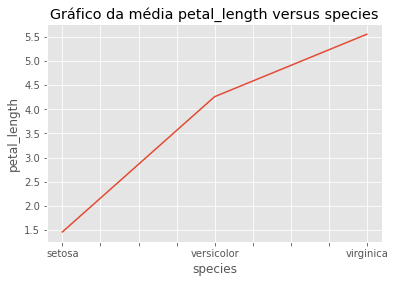

In [137]:
df_iris.groupby(df_iris["species"])["petal_length"].mean().plot()
plt.title("Gráfico da média petal_length versus species")
plt.xlabel("species")
plt.ylabel("petal_length")

Text(0, 0.5, 'petal_length')

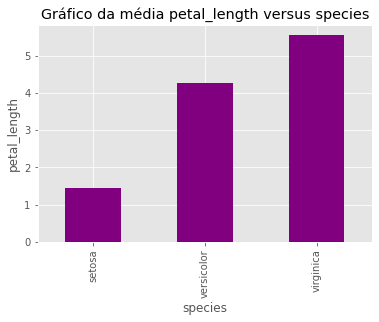

In [138]:
df_iris.groupby(df_iris["species"])["petal_length"].mean().plot.bar(color = "purple")
plt.title("Gráfico da média petal_length versus species")
plt.xlabel("species")
plt.ylabel("petal_length")

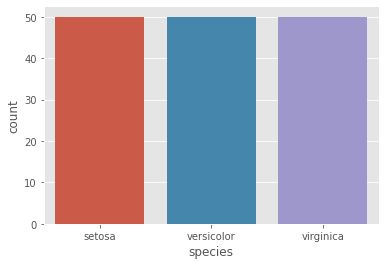

In [139]:
sns.countplot(x = df_iris["species"]) #quantidade de cada espécie

In [140]:
df_setosa.groupby(df_setosa["species"])["petal_length"].value_counts() #analisar quais valores de petal_length existem na espécie == "setosa" e quantas vezes aparecem

species  petal_length
setosa   1.4             13
         1.5             13
         1.3              7
         1.6              7
         1.7              4
         1.2              2
         1.9              2
         1.0              1
         1.1              1
Name: petal_length, dtype: int64

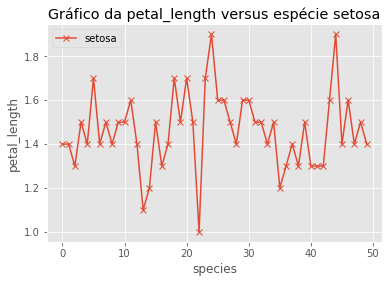

In [141]:
df_setosa.groupby(df_setosa["species"])["petal_length"].plot(marker = "x")
plt.title("Gráfico da petal_length versus espécie setosa")
plt.xlabel("species")
plt.ylabel("petal_length")
plt.legend()
#plt.savefig("setosa.png") para salvar o gráfico

In [142]:
df_versicolor.groupby(df_versicolor["species"])["petal_length"].value_counts() #analisar quais valores de petal_length existem na espécie == "versicolor" e quantas vezes aparecem

species     petal_length
versicolor  4.5             7
            4.0             5
            4.7             5
            4.2             4
            4.4             4
            3.9             3
            4.1             3
            4.6             3
            3.3             2
            3.5             2
            4.3             2
            4.8             2
            4.9             2
            3.0             1
            3.6             1
            3.7             1
            3.8             1
            5.0             1
            5.1             1
Name: petal_length, dtype: int64

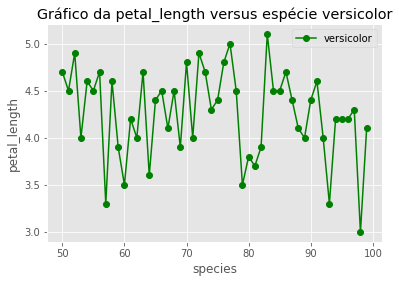

In [143]:
df_versicolor.groupby(df_versicolor["species"])["petal_length"].plot(color = "green", marker = "o")
plt.title("Gráfico da petal_length versus espécie versicolor")
plt.xlabel("species")
plt.ylabel("petal_length")
plt.legend()
#plt.savefig("versicolor.png") para salvar o gráfico

In [144]:
df_virginica.groupby(df_virginica["species"])["petal_length"].value_counts() #analisar quais valores de petal_length existem na espécie == "virginica" e quantas vezes aparecem

species    petal_length
virginica  5.1             7
           5.6             6
           4.9             3
           5.0             3
           5.5             3
           5.7             3
           5.8             3
           6.1             3
           4.8             2
           5.2             2
           5.3             2
           5.4             2
           5.9             2
           6.0             2
           6.7             2
           4.5             1
           6.3             1
           6.4             1
           6.6             1
           6.9             1
Name: petal_length, dtype: int64

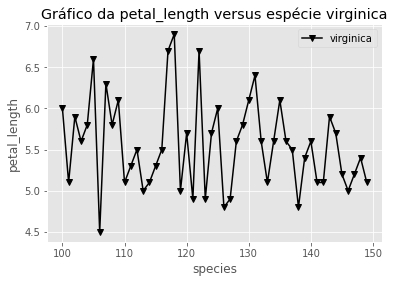

In [145]:
df_virginica.groupby(df_virginica["species"])["petal_length"].plot(color = "black", marker = "v")
plt.title("Gráfico da petal_length versus espécie virginica")
plt.xlabel("species")
plt.ylabel("petal_length")
plt.legend()
#plt.savefig("virginica.png") para salvar o gráfico

**Fazendo a junção dos 3 gráficos acima:**

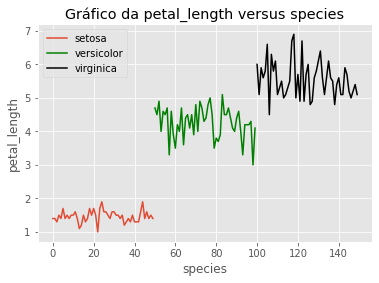

In [146]:
df_setosa.groupby(df_setosa["species"])["petal_length"].plot()
df_versicolor.groupby(df_versicolor["species"])["petal_length"].plot(color = "green")
df_virginica.groupby(df_virginica["species"])["petal_length"].plot(color = "black")
plt.title("Gráfico da petal_length versus species")
plt.xlabel("species")
plt.ylabel("petal_length")
plt.legend()
#plt.savefig("todas_especies.png")

**Salvando os dataframes construídos, caso queira:**

In [147]:
df_setosa.to_csv("setosa.csv")
df_versicolor.to_csv("versicolor.csv")
df_virginica.to_csv("virginica.csv")

**Salvando os gráficos construídos, caso queira, basta colocar em cada plot**

In [148]:
#plt.savefig("imagem.png")